In [1]:
import pandas
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline  
import seaborn as sns

In [2]:
df = pd.read_csv("hUSCensus1990raw50K.csv.bz2",compression = "bz2")

   Unnamed: 0  AAGE  AANCSTR1  AANCSTR2  AAUGMENT  ABIRTHPL  ACITIZEN  ACLASS  \
0           0     0         0         0         0         0         0       0   
1           1     0         0         0         0         0         0       0   
2           2     0         0         0         0         0         0       0   
3           3     0         0         0         0         1         0       0   
4           4     0         0         0         0         0         0       0   

   ADEPART  ADISABL1   ...     TMPABSNT  TRAVTIME  VIETNAM  WEEK89  WORK89  \
0        0         0   ...            3         0        0      52       1   
1        0         0   ...            0         0        0       0       0   
2        0         0   ...            3         0        0       0       2   
3        1         0   ...            0        10        0      24       1   
4        0         0   ...            3         0        0       0       2   

   WORKLWK  WWII  YEARSCH  YEARWRK  YRSSERV 

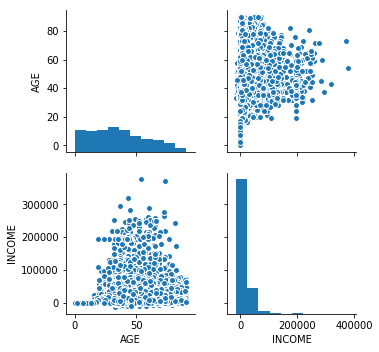

In [3]:
print(df.head())
print(list(df))

plot_df = pd.DataFrame()
plot_df["AGE"] = df[["AGE"]].copy()
plot_df["INCOME"] = df[["INCOME" + str(i) for i in range(1,8)]].sum(axis = 1)


sns_plot = sns.pairplot(plot_df)
sns_plot.savefig('Initial.png')

In [4]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_values = plot_df.sample(n= 1000).values


X_db = sc.fit_transform(df_values)

labels = []
min_score = 9999999

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [5]:
for i in range (2,10):
    n_clusters =i
    labels.append(KMeans(n_clusters=n_clusters).fit_predict(X_db))
for i in range(0,len(labels)):
    number_of_clusters = i +2
    score = metrics.silhouette_score(X_db, labels[i])
    print('for %d clusters the silhouette score is %f'%(number_of_clusters,score))
    if score<min_score:
        min_score=score
        min_clusters = number_of_clusters

print('The lowest silhouette score was achived by %d clusters'%min_clusters)

for 2 clusters the silhouette score is 0.472656
for 3 clusters the silhouette score is 0.489199
for 4 clusters the silhouette score is 0.512840
for 5 clusters the silhouette score is 0.497613
for 6 clusters the silhouette score is 0.497449
for 7 clusters the silhouette score is 0.484882
for 8 clusters the silhouette score is 0.456154
for 9 clusters the silhouette score is 0.459325
The lowest silhouette score was achived by 8 clusters


In [6]:
min_score_agglomerative = 999999
labels_agglomerative = []

for i in range (2,10):
    n_clusters =i
    labels_agglomerative.append(AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X_db))
for i in range(0,len(labels_agglomerative)):
    number_of_clusters_agglomerative = i +2
    score = metrics.silhouette_score(X_db, labels_agglomerative[i])
    print('for %d clusters the silhouette score is %f'%(number_of_clusters_agglomerative,score))
    if score<min_score_agglomerative:
        min_score_agglomerative=score
        min_clusters_agglomerative = number_of_clusters_agglomerative

print('The lowest silhouette score was achived by %d clusters'%min_clusters_agglomerative)

for 2 clusters the silhouette score is 0.477379
for 3 clusters the silhouette score is 0.485046
for 4 clusters the silhouette score is 0.508550
for 5 clusters the silhouette score is 0.471672
for 6 clusters the silhouette score is 0.470276
for 7 clusters the silhouette score is 0.455610
for 8 clusters the silhouette score is 0.447188
for 9 clusters the silhouette score is 0.414589
The lowest silhouette score was achived by 9 clusters
